In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.drop(["ID"], axis=1, inplace=True)
train.describe()

,global_horizontal_irradiance,precipitation,atmospheric_pressure,relative_humidity,air_temperature,wind_direction,wind_speed
count,973439.000000,973439.000000,973439.000000,973439.000000,973439.000000,973439.000000,973439.000000
mean,191.172226,0.005469,1005.602558,87.557049,26.399821,184.860255,1.911692
std,282.451967,0.055166,5.393056,16.043781,4.758667,95.175636,1.216561
min,0.000000,0.000000,986.163000,19.935900,9.031670,0.001493,0.000000
25%,0.000000,0.000000,1001.310000,81.215200,24.137450,128.474500,1.039920
50%,4.626500,0.000000,1005.800000,94.236000,27.301300,172.408000,1.659100
75%,327.273500,0.000000,1010.020000,100.000000,29.317000,265.911000,2.538005
max,1486.420000,4.900000,1018.630000,100.000000,39.945800,360.000000,16.058250


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973439 entries, 0 to 973438
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   global_horizontal_irradiance  973439 non-null  float64
 1    precipitation                973439 non-null  float64
 2   atmospheric_pressure          973439 non-null  float64
 3   relative_humidity             973439 non-null  float64
 4   air_temperature               973439 non-null  float64
 5    wind_direction               973439 non-null  float64
 6   wind_speed                    973439 non-null  float64
dtypes: float64(7)
memory usage: 52.0 MB


In [5]:
train['global_horizontal_irradiance'].value_counts()

0.000000      421259
0.016333          39
0.019000          34
0.010500          34
0.024500          33
               ...  
894.774000         1
15.975700          1
274.599000         1
426.446000         1
763.494000         1
Name: global_horizontal_irradiance, Length: 421633, dtype: int64

(-10.0, 1602.0)

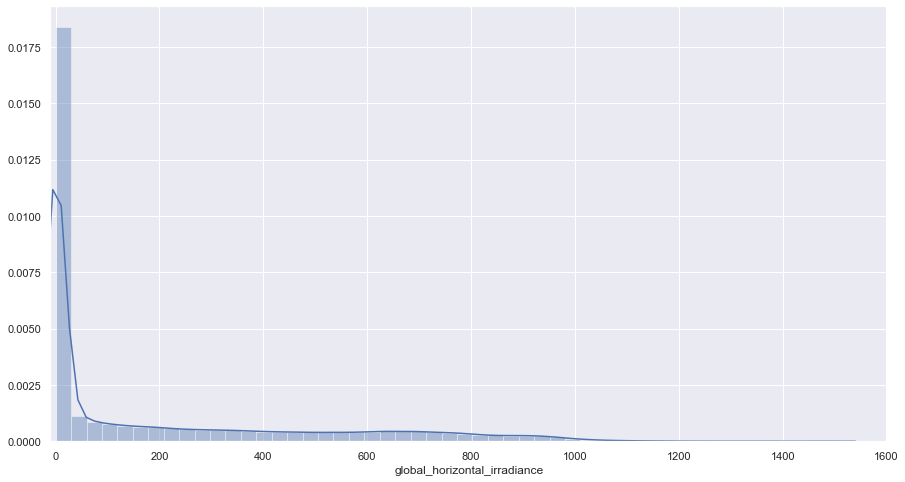

In [6]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(train['global_horizontal_irradiance'])
plt.xlim([-10,1602])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C4A86062E8>,
      dtype=object)

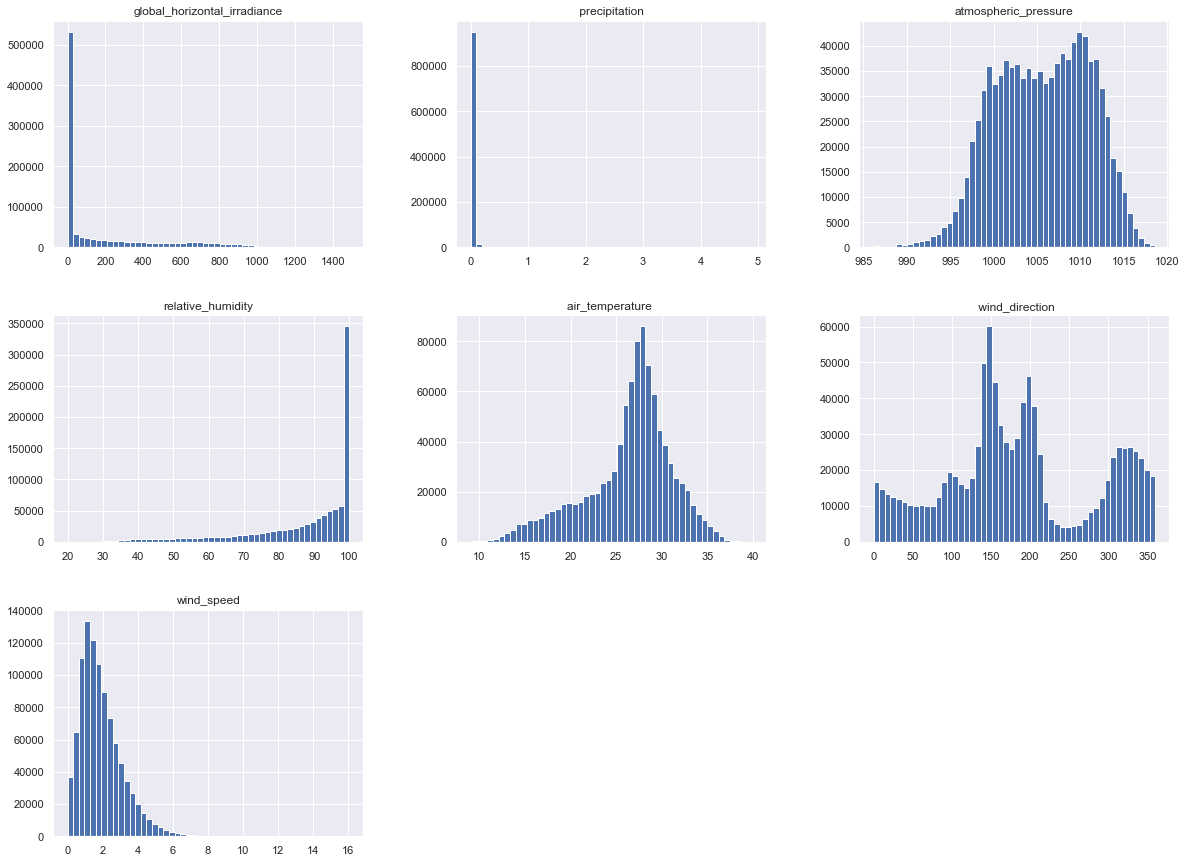

In [7]:
train.hist(bins=50,figsize=(20,15))

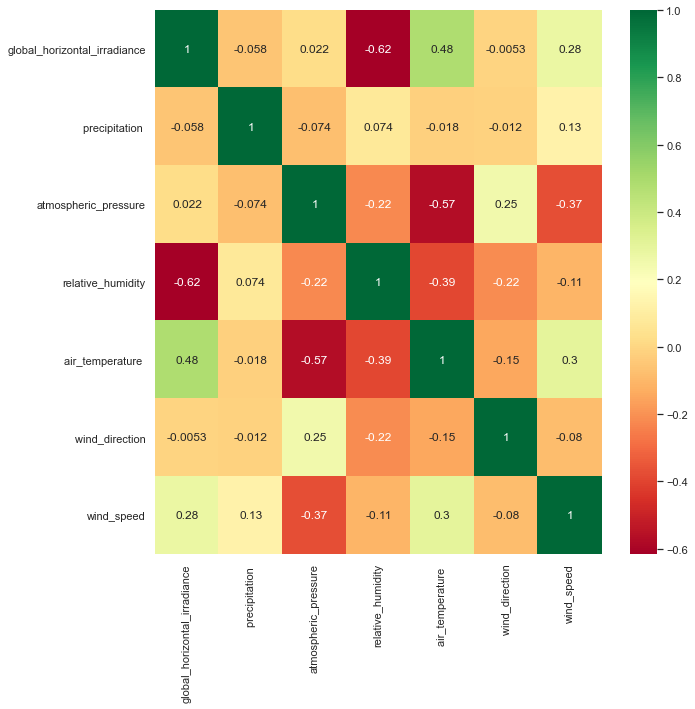

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn')


In [9]:
corr_matrix=train.corr()
print(corr_matrix['global_horizontal_irradiance'].sort_values(ascending=False))

global_horizontal_irradiance    1.000000
air_temperature                 0.483470
wind_speed                      0.279513
atmospheric_pressure            0.022162
 wind_direction                -0.005341
 precipitation                 -0.057924
relative_humidity              -0.615503
Name: global_horizontal_irradiance, dtype: float64


In [4]:
train_set,test_set=train_test_split(train,test_size=0.1,random_state=42)
print(train_set.shape,test_set.shape)

(876095, 7) (97344, 7)


In [5]:
train_label=train_set["global_horizontal_irradiance"].copy()
train_set.drop(['global_horizontal_irradiance'], axis=1, inplace=True)
print(train_set.shape,train_label.shape)

(876095, 6) (876095,)


C:\Users\USER\anaconda3\envs\final_gpu\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
def processing(train_data):
    from sklearn.preprocessing import StandardScaler
    scaled_features = StandardScaler().fit_transform(train_data.values)
    scaled_data=pd.DataFrame(scaled_features,index=train_data.index,columns=train_data.columns)

    return scaled_data

train_data=processing(train_set)

print(train_data.head)

<bound method NDFrame.head of          precipitation   atmospheric_pressure  relative_humidity  \
765123        -0.098972             -0.697778          -0.542181   
290301        -0.098972              0.138365           0.107788   
570959        -0.098972              0.844729           0.135572   
193964        -0.098972             -0.269510          -0.684635   
765692        -0.098972              0.750176          -1.621655   
...                 ...                   ...                ...   
259178        -0.098972              1.293391           0.775686   
365838        -0.098972              0.718659          -0.527212   
131932        -0.098972             -0.977728           0.589913   
671155        -0.098972             -1.337956           0.775686   
121958        -0.098972              1.083892          -2.314389   

        air_temperature    wind_direction  wind_speed  
765123          1.137656        -0.113849    0.153521  
290301         -0.013885         1.555793

In [56]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()

In [57]:
forest_reg.fit(train_data,train_label)

RandomForestRegressor()

In [96]:
from sklearn.metrics import mean_squared_error

predictions = forest_reg.predict(train_data)
basic_mse=mean_squared_error(train_label,predictions)
basic_mse=np.sqrt(basic_mse)
print(basic_mse) #43

KeyboardInterrupt: 

In [97]:
from sklearn.metrics import mean_squared_error

In [98]:
for name, score in zip(train_data.columns, forest_reg.feature_importances_):
    print(name, score)

KeyboardInterrupt: 

In [7]:
solar_data=train_data
print(train_data.columns)

Index([' precipitation ', 'atmospheric_pressure', 'relative_humidity',
       'air_temperature ', ' wind_direction', 'wind_speed'],
      dtype='object')


In [8]:
train_data.drop([' precipitation '], axis=1, inplace=True)
train_data.drop(['wind_speed'], axis=1, inplace=True)
print(train_data.columns)

Index(['atmospheric_pressure', 'relative_humidity', 'air_temperature ',
       ' wind_direction'],
      dtype='object')


In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [86]:
# parameters = {
#     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#     "min_samples_split": [300,500,1000,10000],
#     "min_samples_leaf": [100,200],
#     "max_depth":[5,8,15,20],
#     "max_features":["sqrt"],
#     "subsample":[0.5, 0.618, 0.8, 0.9, 0.95, 1.0],
#     "n_estimators":[30,60,70,80,100]
#     }

# clf = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5, n_jobs=-1)

# clf.fit(train_data, train_label)

KeyboardInterrupt: 

In [11]:
from tensorflow import keras
import tensorflow as tf

WITH SELU:

In [26]:
model = keras.models.Sequential([
    keras.layers.Dense(400, activation="selu",input_shape=train_data.shape[1:],kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(0.2),
    keras.layers.Dense(300, activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(0.3),
    keras.layers.Dense(200, activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(0.2),
    keras.layers.Dense(150, activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(0.2),
    keras.layers.Dense(150, activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(0.2),
    keras.layers.Dense(150, activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(0.2),
    keras.layers.Dense(150, activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(0.2),
    keras.layers.Dense(100, activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(1)
])
# def exponential_decay(lr0, s):
#     def exponential_decay_fn(epoch):
#         return lr0 * 0.1**(epoch / s)
#     return exponential_decay_fn
# exponential_decay_fn = exponential_decay(lr0=0.01, s=100)
#lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

optimizer=keras.optimizers.Nadam(
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999 ,epsilon=1e-07
)
#lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
model.compile(loss="mean_squared_error", optimizer=optimizer,metrics=['accuracy'])



=["accuracyWITH LEAKYRELU:

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(300, activation=keras.layers.LeakyReLU(alpha=0.2),input_shape=train_data.shape[1:],kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(300, activation=keras.layers.LeakyReLU(alpha=0.2),kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(200, activation=keras.layers.LeakyReLU(alpha=0.2),kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(150, activation=keras.layers.LeakyReLU(alpha=0.2),kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(150, activation=keras.layers.LeakyReLU(alpha=0.2),kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(150, activation=keras.layers.LeakyReLU(alpha=0.2),kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
])

optimizer=keras.optimizers.Nadam(
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)

#lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
model.compile(loss="mean_squared_error", optimizer=optimizer,metrics=['accuracy'])

with relu:

In [48]:
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu",input_shape=train_data.shape[1:],kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
])

optimizer=keras.optimizers.Nadam(
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)

#lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
model.compile(loss="mean_squared_error", optimizer=optimizer,metrics=['accuracy'])

In [110]:
train_data.shape[1:]

(4,)

In [14]:
# valid set prepare

y_valid=test_set["global_horizontal_irradiance"].copy()
test_set.drop(['global_horizontal_irradiance'], axis=1, inplace=True)
print(test_set.shape,y_valid.shape)

(97344, 6) (97344,)


C:\Users\USER\anaconda3\envs\final_gpu\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
def processing(train_data):
    from sklearn.preprocessing import StandardScaler
    scaled_features = StandardScaler().fit_transform(train_data.values)
    scaled_data=pd.DataFrame(scaled_features,index=train_data.index,columns=train_data.columns)

    return scaled_data

X_valid=processing(test_set)

X_valid.drop([' precipitation '], axis=1, inplace=True)
X_valid.drop(['wind_speed'], axis=1, inplace=True)
print(X_valid.columns,X_valid.shape)

Index(['atmospheric_pressure', 'relative_humidity', 'air_temperature ',
       ' wind_direction'],
      dtype='object') (97344, 4)


SELU WITH EXP_DECAY:

In [121]:
history=model.fit(train_data, train_label, epochs=100, validation_data=(X_valid, y_valid),batch_size=32,verbose=1,callbacks=[lr_scheduler])

Train on 876095 samples, validate on 97344 samples
Epoch 1/100
876095/876095 [==============================] - 105s 120us/sample - loss: 6528104.4553 - accuracy: 0.0012 - val_loss: 33323.7385 - val_accuracy: 0.0000e+00
Epoch 2/100
876095/876095 [==============================] - 104s 119us/sample - loss: 857619557.8470 - accuracy: 2.6709e-04 - val_loss: 79574.2600 - val_accuracy: 0.0000e+00
Epoch 3/100
876095/876095 [==============================] - 104s 119us/sample - loss: 79979.9736 - accuracy: 2.2829e-06 - val_loss: 79765.4802 - val_accuracy: 0.0000e+00
Epoch 4/100
876095/876095 [==============================] - 105s 120us/sample - loss: 79931.0274 - accuracy: 2.2829e-06 - val_loss: 79593.1546 - val_accuracy: 0.0000e+00
Epoch 5/100
876095/876095 [==============================] - 105s 119us/sample - loss: 79864.3470 - accuracy: 2.2829e-06 - val_loss: 79648.7041 - val_accuracy: 0.0000e+00
Epoch 6/100
876095/876095 [==============================] - 105s 120us/sample - loss: 79860

KeyboardInterrupt: 

In [125]:
history=model.fit(train_data, train_label, epochs=100, validation_data=(X_valid, y_valid),batch_size=32,verbose=1,callbacks=[lr_scheduler])

Train on 876095 samples, validate on 97344 samples
Epoch 1/100
341632/876095 [==========>...................] - ETA: 1:43 - loss: 62391.2564

KeyboardInterrupt: 

In [15]:
history=model.fit(train_data, train_label, epochs=100, validation_data=(X_valid, y_valid),batch_size=32,verbose=1) #lr=0.0001

Train on 876095 samples, validate on 97344 samples
Epoch 1/100
876095/876095 [==============================] - 98s 112us/sample - loss: 28341.4439 - val_loss: 27575.8711
Epoch 2/100
876095/876095 [==============================] - 98s 112us/sample - loss: 26760.2757 - val_loss: 26389.2005
Epoch 3/100
876095/876095 [==============================] - 97s 110us/sample - loss: 26273.0397 - val_loss: 26149.2394
Epoch 4/100
876095/876095 [==============================] - 100s 114us/sample - loss: 25889.9029 - val_loss: 25906.0906
Epoch 5/100
876095/876095 [==============================] - 96s 110us/sample - loss: 25553.2092 - val_loss: 25738.6634
Epoch 6/100
876095/876095 [==============================] - 95s 109us/sample - loss: 25268.9015 - val_loss: 25113.9524
Epoch 7/100
876095/876095 [==============================] - 97s 111us/sample - loss: 24994.3547 - val_loss: 25010.6859
Epoch 8/100
876095/876095 [==============================] - 97s 110us/sample - loss: 24754.2463 - val_loss:

KeyboardInterrupt: 

In [ ]:
history=model.fit(train_data, train_label, epochs=100, validation_data=(X_valid, y_valid),batch_size=32,verbose=1) #lr=0.1

#huge 

***LEAKY_RELU WITH POWER SCHEDULINg: ini=learning_rate=0.1, momentum=0.9,nesterov=True,decay=1e-5,batch_size=64

using with nadam and decay of 1e-5 and initial lr of 0.1

In [32]:
history=model.fit(train_data, train_label, epochs=100, validation_data=(X_valid, y_valid),batch_size=100,verbose=1)

Train on 876095 samples, validate on 97344 samples
Epoch 1/100
876095/876095 [==============================] - 65s 74us/sample - loss: 29389.3878 - val_loss: 27337.8496
Epoch 2/100
876095/876095 [==============================] - 63s 72us/sample - loss: 28252.2996 - val_loss: 27678.4992
Epoch 3/100
876095/876095 [==============================] - 62s 71us/sample - loss: 27869.9914 - val_loss: 26764.2089
Epoch 4/100
876095/876095 [==============================] - 63s 72us/sample - loss: 27634.9221 - val_loss: 26826.6562
Epoch 5/100
876095/876095 [==============================] - 64s 73us/sample - loss: 27476.8434 - val_loss: 28111.8115
Epoch 6/100
876095/876095 [==============================] - 63s 72us/sample - loss: 27356.1153 - val_loss: 30782.3659
Epoch 7/100
876095/876095 [==============================] - 64s 73us/sample - loss: 27264.8053 - val_loss: 26505.7659
Epoch 8/100
625300/876095 [====================>.........] - ETA: 17s - loss: 27177.1887

KeyboardInterrupt: 

using with nadam and decay of 1e-5 and initial lr of 0.001 # fails
using with nadam and decay of 1e-3 and initial lr of 0.1  #fails
using with nadam  and initial lr of 0.0002 
using with nadam  and initial lr of 0.0001


In [16]:
history=model.fit(train_data, train_label, epochs=100, validation_data=(X_valid, y_valid),batch_size=64,verbose=1)

Train on 876095 samples, validate on 97344 samples
Epoch 1/100
876095/876095 [==============================] - 55s 63us/sample - loss: 28602.4229 - accuracy: 0.0054 - val_loss: 27212.4905 - val_accuracy: 0.0012
Epoch 2/100
876095/876095 [==============================] - 53s 60us/sample - loss: 26786.8124 - accuracy: 0.0016 - val_loss: 26928.8933 - val_accuracy: 0.0051
Epoch 3/100
876095/876095 [==============================] - 53s 61us/sample - loss: 26341.5450 - accuracy: 0.0033 - val_loss: 27346.0952 - val_accuracy: 0.0043
Epoch 4/100
876095/876095 [==============================] - 53s 60us/sample - loss: 26029.9925 - accuracy: 0.0047 - val_loss: 26016.7007 - val_accuracy: 0.0040
Epoch 5/100
876095/876095 [==============================] - 57s 65us/sample - loss: 25754.4348 - accuracy: 0.0059 - val_loss: 25848.8000 - val_accuracy: 0.0048
Epoch 6/100
876095/876095 [==============================] - 53s 61us/sample - loss: 25496.8698 - accuracy: 0.0070 - val_loss: 25428.6747 - val_

876095/876095 [==============================] - 52s 59us/sample - loss: 20973.0595 - accuracy: 0.0431 - val_loss: 21483.3510 - val_accuracy: 0.0724
Epoch 52/100
876095/876095 [==============================] - 52s 59us/sample - loss: 20923.2091 - accuracy: 0.0438 - val_loss: 21531.5089 - val_accuracy: 0.0629
Epoch 53/100
876095/876095 [==============================] - 53s 60us/sample - loss: 20878.4331 - accuracy: 0.0442 - val_loss: 21658.2734 - val_accuracy: 0.0374
Epoch 54/100
876095/876095 [==============================] - 52s 60us/sample - loss: 20808.2090 - accuracy: 0.0441 - val_loss: 21458.8144 - val_accuracy: 0.0404
Epoch 55/100
876095/876095 [==============================] - 54s 62us/sample - loss: 20776.1460 - accuracy: 0.0454 - val_loss: 21396.7946 - val_accuracy: 0.0526
Epoch 56/100
876095/876095 [==============================] - 54s 62us/sample - loss: 20725.9997 - accuracy: 0.0456 - val_loss: 21375.0306 - val_accuracy: 0.0377
Epoch 57/100
876095/876095 [=============

using with nadam  and initial lr of 0.0001 and much more hidden layers and alphadropout(0.2) #excessive validation loss

In [25]:
history=model.fit(train_data, train_label, epochs=100, validation_data=(X_valid, y_valid),batch_size=64,verbose=1)

Train on 876095 samples, validate on 97344 samples
Epoch 1/100
876095/876095 [==============================] - 77s 88us/sample - loss: 35906.3903 - accuracy: 0.0084 - val_loss: 8197060.5434 - val_accuracy: 0.0000e+00
Epoch 2/100
876095/876095 [==============================] - 73s 83us/sample - loss: 32443.6526 - accuracy: 3.6526e-05 - val_loss: 5127873.7679 - val_accuracy: 0.0000e+00
Epoch 3/100
876095/876095 [==============================] - 76s 87us/sample - loss: 31681.6543 - accuracy: 1.0615e-04 - val_loss: 2868104.2467 - val_accuracy: 0.0000e+00
Epoch 4/100
876095/876095 [==============================] - 73s 83us/sample - loss: 31604.0673 - accuracy: 1.1985e-04 - val_loss: 1553135.6925 - val_accuracy: 0.0000e+00
Epoch 5/100
876095/876095 [==============================] - 74s 85us/sample - loss: 32422.4731 - accuracy: 1.8948e-04 - val_loss: 1414632.2495 - val_accuracy: 0.0000e+00
Epoch 6/100
876095/876095 [==============================] - 74s 85us/sample - loss: 30781.8023 - 

KeyboardInterrupt: 

using with nadam  and initial lr of 0.0001 and alphadropout(0.2) #excessive validation loss

In [27]:
history=model.fit(train_data, train_label, epochs=100, validation_data=(X_valid, y_valid),batch_size=64,verbose=1)

Train on 876095 samples, validate on 97344 samples
Epoch 1/100
876095/876095 [==============================] - 73s 83us/sample - loss: 34605.7454 - accuracy: 0.0090 - val_loss: 2872167.2145 - val_accuracy: 0.0000e+00
Epoch 2/100
876095/876095 [==============================] - 70s 80us/sample - loss: 30711.5116 - accuracy: 1.0273e-05 - val_loss: 1350919.0922 - val_accuracy: 0.0844
Epoch 3/100
876095/876095 [==============================] - 70s 79us/sample - loss: 29887.9178 - accuracy: 3.0819e-05 - val_loss: 687610.3704 - val_accuracy: 0.2802
Epoch 4/100
876095/876095 [==============================] - 70s 79us/sample - loss: 29403.7483 - accuracy: 7.7617e-05 - val_loss: 477913.1807 - val_accuracy: 0.3357
Epoch 5/100
876095/876095 [==============================] - 71s 82us/sample - loss: 29053.4780 - accuracy: 2.0317e-04 - val_loss: 398653.9170 - val_accuracy: 0.3366
Epoch 6/100
876095/876095 [==============================] - 72s 82us/sample - loss: 28782.5803 - accuracy: 3.4129e-0

KeyboardInterrupt: 

with nadam  and initial lr of 0.0002 

In [52]:
# with 0.0002 and selu
from sklearn.metrics import mean_squared_error

predictions = model.predict(train_data)
basic_mse=mean_squared_error(train_label,predictions)
basic_mse=np.sqrt(basic_mse)
print(basic_mse)

140.52595331471775


with nadam  and initial lr of 0.0001

In [17]:
predictions = model.predict(train_data)
basic_mse=mean_squared_error(train_label,predictions)
basic_mse=np.sqrt(basic_mse)
print(basic_mse)

137.76779464998873
